# Example notebook training of an RL agent using Ray RLlib
#### *(using th CartPole-v1 gym environnment)*

### Import requirements

In [1]:
from ray.rllib.agents.ppo import PPOTrainer
from ray.rllib.models import ModelCatalog
import numpy as np
import matplotlib.pyplot as plt
import LTCRL.utils as lru               # Utilities for training LTCs with pytorch
import LTCRL.models as models

## Training an agent with a simple perceptron

### Define a config dictionary for our trainer 
Here we train on the cartpole-v1 openAI gym environment with a 2 layer 64 neuron perceptron as our policy net and PPO as our training algorithm.

In [2]:
config = {
    # Environment (RLlib understands openAI gym registered strings).
    "env": "CartPole-v1",
    # Use 2 environment workers (aka "rollout workers") that parallelly
    # collect samples from their own environment clone(s).
    "num_workers": 8,
    # Change this to "framework: torch", if you are using PyTorch.
    # Also, use "framework: tf2" for tf2.x eager execution.
    "framework": "torch",
    # Tweak the default model provided automatically by RLlib,
    # given the environment's observation- and action spaces.
    "model": {
        "fcnet_hiddens": [64, 64],
        "fcnet_activation": "relu",
    },
    # Set up a separate evaluation worker set for the
    # `trainer.evaluate()` call after training (see below).
    "evaluation_num_workers": 1,
    # Only for evaluation runs, render the env.
    "evaluation_config": {
        "render_env": True,
    }
}

### Train the agent with our defined config

In [3]:
# Instanciate the PPO trainer object
trainer = PPOTrainer(config=config)

# Run it for n training iterations. A training iteration includes
# parallel sample collection by the environment workers as well as
# loss calculation on the collected batch and a model update.
log = []
iterations = 140
for i in range(iterations):
    print("iteration : " +str(i), ", ")
    log.append(trainer.train())
    print('len : ' + str(log[i]['episode_len_mean']))
    print('avg_rev : ' + str(np.array(log[i]['hist_stats']['episode_reward']).mean()))
    # if i % 5 == 0:
        # trainer.evaluate()
        # trainer.evaluate()

2022-03-17 14:11:52,028	WARNING trainer.py:2279 -- You have specified 1 evaluation workers, but your `evaluation_interval` is None! Therefore, evaluation will not occur automatically with each call to `Trainer.train()`. Instead, you will have to call `Trainer.evaluate()` manually in order to trigger an evaluation run.
2022-03-17 14:11:52,032	WARNING ppo.py:223 -- `train_batch_size` (4000) cannot be achieved with your other settings (num_workers=8 num_envs_per_worker=1 rollout_fragment_length=200)! Auto-adjusting `rollout_fragment_length` to 500.
(pid=1547) 
(pid=1539) 
(pid=1549) 
(pid=1543) 
(pid=1548) 
(pid=1537) 
(pid=1542) 
(pid=1535) 
(RolloutWorker pid=1547) 2022-03-17 14:12:01,520	WARNING deprecation.py:45 -- DeprecationWarning: `rllib.env.remote_vector_env.RemoteVectorEnv` has been deprecated. Use `ray.rllib.env.remote_base_env.RemoteBaseEnv` instead. This will raise an error in the future!
(RolloutWorker pid=1539) 2022-03-17 14:12:01,520	WARNING deprecation.py:45 -- Deprecatio

iteration : 0 , 


(pid=1541) 


len : 25.01298701298701
avg_rev : 25.01298701298701
iteration : 1 , 


(RolloutWorker pid=1541) 2022-03-17 14:12:06,525	WARNING deprecation.py:45 -- DeprecationWarning: `rllib.env.remote_vector_env.RemoteVectorEnv` has been deprecated. Use `ray.rllib.env.remote_base_env.RemoteBaseEnv` instead. This will raise an error in the future!


len : 34.98245614035088
avg_rev : 34.98245614035088
iteration : 2 , 
len : 46.63
avg_rev : 46.63
iteration : 3 , 
len : 66.71
avg_rev : 66.71
iteration : 4 , 
len : 90.73
avg_rev : 90.73
iteration : 5 , 
len : 121.78
avg_rev : 121.78
iteration : 6 , 
len : 148.68
avg_rev : 148.68
iteration : 7 , 
len : 172.79
avg_rev : 172.79
iteration : 8 , 
len : 203.37
avg_rev : 203.37
iteration : 9 , 
len : 216.96
avg_rev : 216.96
iteration : 10 , 
len : 247.27
avg_rev : 247.27
iteration : 11 , 
len : 263.82
avg_rev : 263.82
iteration : 12 , 
len : 278.42
avg_rev : 278.42
iteration : 13 , 
len : 282.0
avg_rev : 282.0
iteration : 14 , 
len : 296.64
avg_rev : 296.64
iteration : 15 , 
len : 312.33
avg_rev : 312.33
iteration : 16 , 
len : 318.86
avg_rev : 318.86
iteration : 17 , 
len : 326.02
avg_rev : 326.02
iteration : 18 , 
len : 317.74
avg_rev : 317.74
iteration : 19 , 
len : 320.6
avg_rev : 320.6
iteration : 20 , 
len : 321.08
avg_rev : 321.08
iteration : 21 , 
len : 336.64
avg_rev : 336.64
iterat

Text(0.5, 1.0, 'Mean reward (reward = ep_length)')

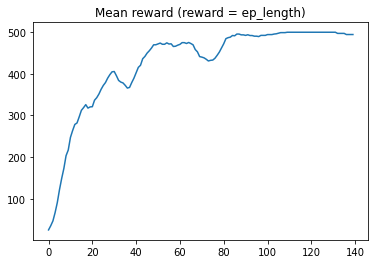

In [4]:
mean_rev = np.array(list(l['episode_reward_mean'] for l in log))
plt.plot(mean_rev)
plt.title('Mean reward (reward = ep_length)')

In [13]:
# Evaluate the trained Trainer (and render each timestep to the shell's
# output).
trainer.evaluate()

{'evaluation': {'episode_reward_max': 500.0,
  'episode_reward_min': 500.0,
  'episode_reward_mean': 500.0,
  'episode_len_mean': 500.0,
  'episode_media': {},
  'episodes_this_iter': 10,
  'policy_reward_min': {},
  'policy_reward_max': {},
  'policy_reward_mean': {},
  'custom_metrics': {},
  'hist_stats': {'episode_reward': [500.0,
    500.0,
    500.0,
    500.0,
    500.0,
    500.0,
    500.0,
    500.0,
    500.0,
    500.0],
   'episode_lengths': [500, 500, 500, 500, 500, 500, 500, 500, 500, 500]},
  'sampler_perf': {'mean_raw_obs_processing_ms': 0.16081234226583446,
   'mean_inference_ms': 1.1958139751591859,
   'mean_action_processing_ms': 0.0677120684385419,
   'mean_env_wait_ms': 0.11465630761600351,
   'mean_env_render_ms': 8.689365128542992},
  'off_policy_estimator': {},
  'timesteps_this_iter': 0}}

## Training an agent with a simple RNN

### Add our custom model to the catalog

In [6]:
ModelCatalog.register_custom_model("naiveRNN", models.NaiveRNN)

### Define a config dictionary for our trainer 
Here we train on the cartpole-v1 openAI gym environment with a simple RNN as our policy net and PPO as our training algorithm.

In [20]:
rnn_config = {
    # Environment (RLlib understands openAI gym registered strings).
    "env": "CartPole-v1",
    # Use 2 environment workers (aka "rollout workers") that parallelly
    # collect samples from their own environment clone(s).
    "num_workers": 4,
    # Change this to "framework: torch", if you are using PyTorch.
    # Also, use "framework: tf2" for tf2.x eager execution.
    "framework": "torch",
    # Tweak the default model provided automatically by RLlib,
    # given the environment's observation- and action spaces.
    "model": {
        "custom_model": "naiveRNN",
        "max_seq_len": 10,
    },
    # Set up a separate evaluation worker set for the
    # `trainer.evaluate()` call after training (see below).
    "evaluation_num_workers": 1,
    # Only for evaluation runs, render the env.
    "evaluation_config": {
        "render_env": True,
    }
}

In [21]:
# Instanciate the PPO trainer object
rnn_trainer = PPOTrainer(config=rnn_config)

# Run it for n training iterations. A training iteration includes
# parallel sample collection by the environment workers as well as
# loss calculation on the collected batch and a model update.
log_rnn = []
iterations = 140
for i in range(iterations):
    print("iteration : " +str(i), ", ")
    log_rnn.append(rnn_trainer.train())
    print('len : ' + str(log[i]['episode_len_mean']))
    print('avg_rev : ' + str(np.array(log[i]['hist_stats']['episode_reward']).mean()))
    # if i % 5 == 0:
        # trainer.evaluate()
        # trainer.evaluate()

2022-03-17 15:31:07,442	WARNING trainer.py:2279 -- You have specified 1 evaluation workers, but your `evaluation_interval` is None! Therefore, evaluation will not occur automatically with each call to `Trainer.train()`. Instead, you will have to call `Trainer.evaluate()` manually in order to trigger an evaluation run.
(pid=4384) 
(pid=4385) 
(RolloutWorker pid=4384) 2022-03-17 15:31:14,580	ERROR worker.py:432 -- Exception raised in creation task: The actor died because of an error raised in its creation task, ray::RolloutWorker.__init__() (pid=4384, ip=127.0.0.1)
(RolloutWorker pid=4384)   File "/Users/renard/miniconda3/envs/torchLTC/lib/python3.8/site-packages/ray/rllib/evaluation/rollout_worker.py", line 588, in __init__
(RolloutWorker pid=4384)     self._build_policy_map(
(RolloutWorker pid=4384)   File "/Users/renard/miniconda3/envs/torchLTC/lib/python3.8/site-packages/ray/rllib/evaluation/rollout_worker.py", line 1555, in _build_policy_map
(RolloutWorker pid=4384)     self.policy_

RayActorError: The actor died because of an error raised in its creation task, [36mray::RolloutWorker.__init__()[39m (pid=4384, ip=127.0.0.1)
  File "/Users/renard/miniconda3/envs/torchLTC/lib/python3.8/site-packages/ray/rllib/evaluation/rollout_worker.py", line 588, in __init__
    self._build_policy_map(
  File "/Users/renard/miniconda3/envs/torchLTC/lib/python3.8/site-packages/ray/rllib/evaluation/rollout_worker.py", line 1555, in _build_policy_map
    self.policy_map.create_policy(name, orig_cls, obs_space, act_space,
  File "/Users/renard/miniconda3/envs/torchLTC/lib/python3.8/site-packages/ray/rllib/policy/policy_map.py", line 143, in create_policy
    self[policy_id] = class_(observation_space, action_space,
  File "/Users/renard/miniconda3/envs/torchLTC/lib/python3.8/site-packages/ray/rllib/agents/ppo/ppo_torch_policy.py", line 50, in __init__
    self._initialize_loss_from_dummy_batch()
  File "/Users/renard/miniconda3/envs/torchLTC/lib/python3.8/site-packages/ray/rllib/policy/policy.py", line 801, in _initialize_loss_from_dummy_batch
    self.compute_actions_from_input_dict(
  File "/Users/renard/miniconda3/envs/torchLTC/lib/python3.8/site-packages/ray/rllib/policy/torch_policy.py", line 294, in compute_actions_from_input_dict
    return self._compute_action_helper(input_dict, state_batches,
  File "/Users/renard/miniconda3/envs/torchLTC/lib/python3.8/site-packages/ray/rllib/utils/threading.py", line 21, in wrapper
    return func(self, *a, **k)
  File "/Users/renard/miniconda3/envs/torchLTC/lib/python3.8/site-packages/ray/rllib/policy/torch_policy.py", line 934, in _compute_action_helper
    dist_inputs, state_out = self.model(input_dict, state_batches,
  File "/Users/renard/miniconda3/envs/torchLTC/lib/python3.8/site-packages/ray/rllib/models/modelv2.py", line 243, in __call__
    res = self.forward(restored, state or [], seq_lens)
  File "/Users/renard/miniconda3/envs/torchLTC/lib/python3.8/site-packages/ray/rllib/models/torch/recurrent_net.py", line 83, in forward
    output, new_state = self.forward_rnn(inputs, state, seq_lens)
  File "/Users/renard/Documents/etudes/EPFLMA4/LTC/code/LTCRL/models.py", line 60, in forward_rnn
    x, h = self.rnn( inputs, torch.unsqueeze(state, 0))
  File "/Users/renard/miniconda3/envs/torchLTC/lib/python3.8/site-packages/torch/nn/modules/module.py", line 1102, in _call_impl
    return forward_call(*input, **kwargs)
  File "/Users/renard/miniconda3/envs/torchLTC/lib/python3.8/site-packages/torch/nn/modules/rnn.py", line 265, in forward
    self.check_forward_args(input, hx, batch_sizes)
  File "/Users/renard/miniconda3/envs/torchLTC/lib/python3.8/site-packages/torch/nn/modules/rnn.py", line 229, in check_forward_args
    self.check_input(input, batch_sizes)
  File "/Users/renard/miniconda3/envs/torchLTC/lib/python3.8/site-packages/torch/nn/modules/rnn.py", line 205, in check_input
    raise RuntimeError(
RuntimeError: input.size(-1) must be equal to input_size. Expected 64, got 4

(RolloutWorker pid=4385)   File "/Users/renard/miniconda3/envs/torchLTC/lib/python3.8/site-packages/torch/nn/modules/module.py", line 1102, in _call_impl
(RolloutWorker pid=4385)     return forward_call(*input, **kwargs)
(RolloutWorker pid=4385)   File "/Users/renard/miniconda3/envs/torchLTC/lib/python3.8/site-packages/torch/nn/modules/rnn.py", line 265, in forward
(RolloutWorker pid=4385)     self.check_forward_args(input, hx, batch_sizes)
(RolloutWorker pid=4385)   File "/Users/renard/miniconda3/envs/torchLTC/lib/python3.8/site-packages/torch/nn/modules/rnn.py", line 229, in check_forward_args
(RolloutWorker pid=4385)     self.check_input(input, batch_sizes)
(RolloutWorker pid=4385)   File "/Users/renard/miniconda3/envs/torchLTC/lib/python3.8/site-packages/torch/nn/modules/rnn.py", line 205, in check_input
(RolloutWorker pid=4385)     raise RuntimeError(
(RolloutWorker pid=4385) RuntimeError: input.size(-1) must be equal to input_size. Expected 64, got 4
(pid=4392) 
(pid=4391) 
(Roll

Text(0.5, 1.0, 'Mean reward (reward = ep_length)')

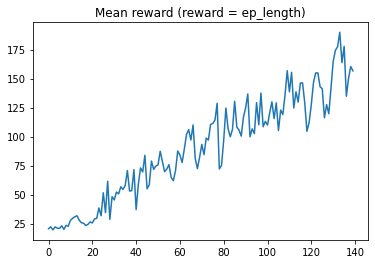

In [9]:
mean_rev_rnn = np.array(list(l['episode_reward_mean'] for l in log_rnn))
plt.plot(mean_rev_rnn)
plt.title('Mean reward (reward = ep_length)')

In [12]:
rnn_trainer.evaluate()

{'evaluation': {'episode_reward_max': 294.0,
  'episode_reward_min': 54.0,
  'episode_reward_mean': 132.4,
  'episode_len_mean': 132.4,
  'episode_media': {},
  'episodes_this_iter': 10,
  'policy_reward_min': {},
  'policy_reward_max': {},
  'policy_reward_mean': {},
  'custom_metrics': {},
  'hist_stats': {'episode_reward': [87.0,
    111.0,
    105.0,
    228.0,
    54.0,
    55.0,
    233.0,
    79.0,
    294.0,
    78.0],
   'episode_lengths': [87, 111, 105, 228, 54, 55, 233, 79, 294, 78]},
  'sampler_perf': {'mean_raw_obs_processing_ms': 0.2172583031889964,
   'mean_inference_ms': 3.011574287645597,
   'mean_action_processing_ms': 0.11847761736046862,
   'mean_env_wait_ms': 0.0940886963542419,
   'mean_env_render_ms': 3.728769598472334},
  'off_policy_estimator': {},
  'timesteps_this_iter': 0}}

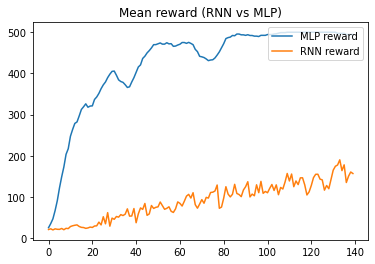

In [11]:
mean_rev = np.array(list(l['episode_reward_mean'] for l in log))
mean_rev_rnn = np.array(list(l['episode_reward_mean'] for l in log_rnn))
plt.plot(mean_rev,label='MLP reward')
plt.plot(mean_rev_rnn,label='RNN reward')
plt.title('Mean reward (RNN vs MLP)')
plt.legend(loc="upper right")
plt.show()